# STEP 1: DATA LOADING AND UNDERSTANDING

### important packages

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import balanced_accuracy_score

In [ ]:
# READ DATA
train = pd.read_csv("train.csv")

In [3]:
train.head()

,id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude
0,1,fc7e6d61ad96136f2f84e65cb578719128a76777,2019-05-10T21:45:00Z,2019-05-10T22:00:00Z,420.0,0.00,8.0,8.0,6.00,0.00,0.0,0.0,6.00,Cash,Blue Ribbon Taxi Association Inc.,41.898332,-87.620763,41.907520,-87.626659
1,2,32e3320b2ad8fc0e4c90c95d962029be24d38ca2,2019-01-16T08:00:00Z,2019-01-16T08:00:00Z,419.0,1.00,8.0,8.0,6.25,1.00,0.0,0.0,7.75,Credit Card,City Service,41.892042,-87.631864,41.895033,-87.619711
2,3,39127d25654f081bbc273d7fe29e44c140d0c210,2018-10-27T14:30:00Z,2018-10-27T14:45:00Z,1175.0,3.30,33.0,8.0,13.25,3.31,NaN,0.0,16.56,Credit Card,Flash Cab,41.859350,-87.617358,41.892042,-87.631864
3,4,90bd7186d83d9653bd0453dd16c143941e597f6b,2019-09-25T17:30:00Z,2019-09-25T17:45:00Z,609.0,2.52,28.0,24.0,9.75,2.00,0.0,0.0,12.25,Credit Card,Sun Taxi,41.874005,-87.663518,41.901207,-87.676356
4,5,455653ef8a20a3125f30a4938ec1eedadef50ab5,2018-12-14T15:15:00Z,2018-12-14T15:30:00Z,1026.0,1.60,NaN,NaN,10.00,2.00,0.0,0.0,12.50,Credit Card,Flash Cab,NaN,NaN,NaN,NaN


In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          200000 non-null  int64  
 1   taxi_id                     200000 non-null  object 
 2   trip_start_timestamp        200000 non-null  object 
 3   trip_end_timestamp          199989 non-null  object 
 4   trip_seconds                199950 non-null  float64
 5   trip_miles                  199989 non-null  float64
 6   pickup_community_area       185515 non-null  float64
 7   dropoff_community_area      180433 non-null  float64
 8   fare                        199980 non-null  float64
 9   tips                        199980 non-null  float64
 10  tolls                       189847 non-null  float64
 11  extras                      199980 non-null  float64
 12  trip_total                  199980 non-null  float64
 13  payment_type  

In [10]:
print(train.isnull().sum()/len(train) *100)

id                            0.0000
taxi_id                       0.0000
trip_start_timestamp          0.0000
trip_end_timestamp            0.0055
trip_seconds                  0.0250
trip_miles                    0.0055
pickup_community_area         7.2425
dropoff_community_area        9.7835
fare                          0.0100
tips                          0.0100
tolls                         5.0765
extras                        0.0100
trip_total                    0.0100
payment_type                  0.0000
company                       0.0000
pickup_centroid_latitude      7.2290
pickup_centroid_longitude     7.2290
dropoff_centroid_latitude     9.4375
dropoff_centroid_longitude    9.4375
dtype: float64


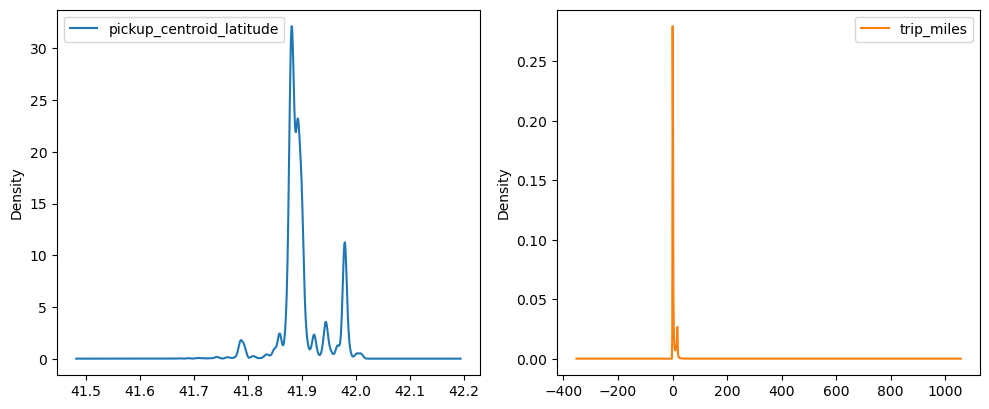

In [20]:
# Specify the columns to plot
columns_to_plot = ['payment_type', 'company', 'pickup_centroid_latitude','trip_miles']  # Replace with your column names

train[columns_to_plot].plot(kind='kde', subplots=True, layout=(2, 2), figsize=(10, 8), sharex=False)
plt.tight_layout()
plt.show()


In [ ]:
columns_to_check = ['payment_type', 'company']  # Replace with your column names

for col in columns_to_check:
    if col in train.columns:
        print(f"Value percentages for column: {col}")
        value_counts = train[col].value_counts(normalize=True) * 100
        print(value_counts)
        print("\n")


Value percentages for column: payment_type
payment_type
Cash           49.5825
Credit Card    47.7605
Mobile          1.1625
Prcard          0.6975
Unknown         0.5370
No Charge       0.2095
Dispute         0.0360
Pcard           0.0080
Prepaid         0.0065
Name: proportion, dtype: float64


Value percentages for column: company
company
Taxi Affiliation Services                       19.8215
Flash Cab                                       14.5235
Chicago Carriage Cab Corp                       11.1860
Medallion Leasin                                 7.1660
Sun Taxi                                         7.1025
City Service                                     6.5670
Star North Management LLC                        5.8435
Blue Ribbon Taxi Association Inc.                4.7440
Choice Taxi Association                          3.3520
Taxi Affiliation Service Yellow                  3.2780
Globe Taxi                                       2.1370
Nova Taxi Affiliation Llc               

In [ ]:
columns_to_display = ['id', 'company', 'trip_start_timestamp']

train[columns_to_display].head(20)

,id,company,trip_start_timestamp
0,1,Blue Ribbon Taxi Association Inc.,2019-05-10T21:45:00Z
1,2,City Service,2019-01-16T08:00:00Z
2,3,Flash Cab,2018-10-27T14:30:00Z
3,4,Sun Taxi,2019-09-25T17:30:00Z
4,5,Flash Cab,2018-12-14T15:15:00Z
5,6,Star North Management LLC,2019-02-13T14:30:00Z
6,7,Star North Management LLC,2019-05-23T18:00:00Z
7,8,Taxi Affiliation Services,2019-06-06T14:15:00Z
8,9,Star North Management LLC,2019-08-29T15:15:00Z
9,10,Setare Inc,2019-01-21T02:15:00Z


# STEP 2: FEATURE ENGINEERING